In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys 
sys.path.append('..')

from tools import amputation
from tools import imputation
from tools import utils
from tools.utils import colors
from tqdm import tqdm

from importlib import reload

In [3]:
from data import fetch_data

In [4]:
plt.style.use(utils.plot_style)

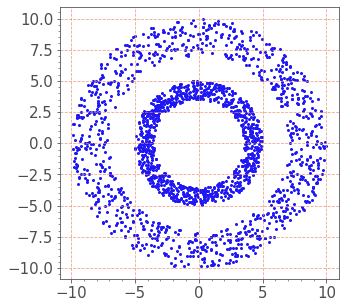

In [5]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()




##  Ampyte

In [10]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [77]:
imputer_names = ['mean', 'knn', 'mice', 'miceforest']#, 'sinkhorn', 'mean', 'linearRR', 'midas']
p_miss = 0.7
mech = "MAR"
ncols = len(imputer_names)
datasets_miss = []
imps = []
X_miss, mask = amputation.ampute(dataset, 0.5, "MAR")

In [78]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

## Toy impute

In [79]:
for imputer_name in imputer_names:    
    imp = imputation.impute(X_miss, imputer_name)
    datasets_miss.append(X_miss)
    imps.append(imp)

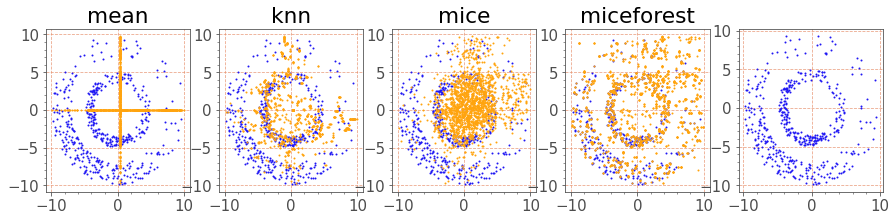

In [80]:
ncols = len(imputer_names)
fig, axs = plt.subplots(ncols=ncols + 1, nrows = 1, figsize=(3*(ncols + 1), 3))
for i in range(ncols):
    axs[i].plot(datasets_miss[i][:,0],datasets_miss[i][:,1], 'o')
    axs[i].plot(imps[i][np.where(mask)[0]][:,0],imps[i][np.where(mask)[0]][:,1], 'o')
    axs[i].set_title(f"{imputer_names[i]}", fontsize="x-large")

axs[-1].plot(datasets_miss[0][:,0],datasets_miss[0][:,1], 'o')
plt.savefig(f"figures/{mech}_{np.array(p_miss)*100} %, impute: {imputer_names}.png", dpi=200)

# Diabetes data

-- age age in years


-- sex


bmi body mass index


bp average blood pressure


s1 tc, total serum cholesterol


s2 ldl, low-density lipoproteins


s3 hdl, high-density lipoproteins


s4 tch, total cholesterol / HDL


s5 ltg, possibly log of serum triglycerides level


s6 glu, blood sugar level

In [81]:
X_full, y_full = load_diabetes(return_X_y=True,as_frame=True, scaled=False)

In [82]:
X_full.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


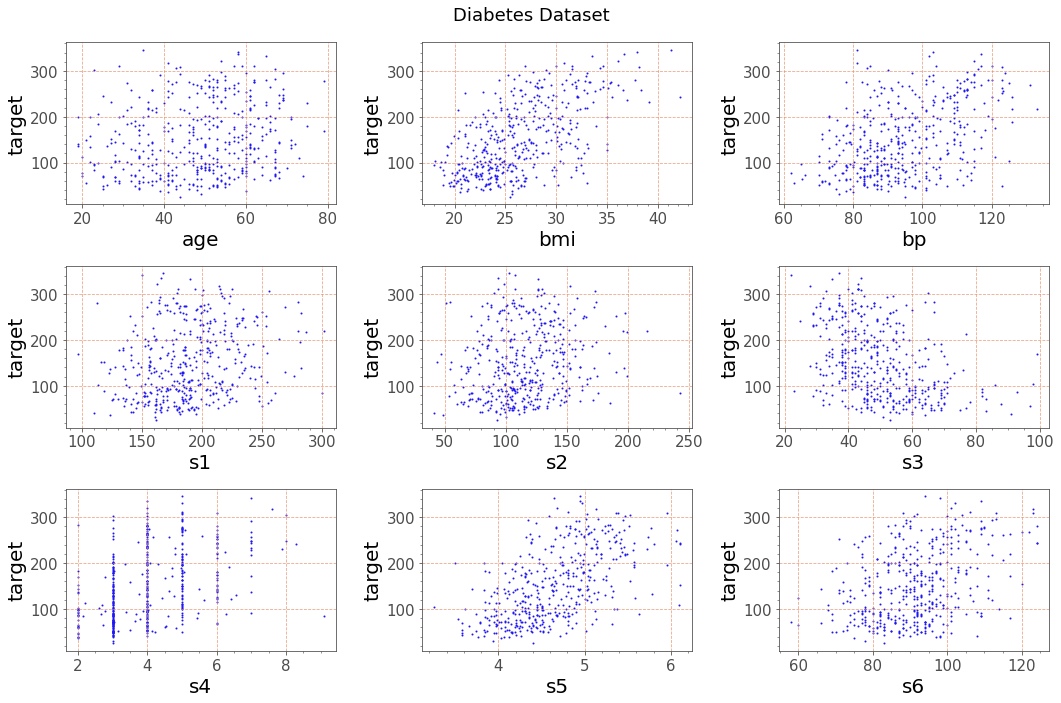

In [85]:
# Don't plot the sex data
features = list(X_full.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_full[feature], y_full, s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

#### Correlation map

In [86]:
corr = X_full.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


#### Sorted correlation for better visibility

In [104]:
def sorted_corr_pairs(corr_df):
    corr_pairs = []
    indxs = []
    col_names = []
    for idx, col in enumerate(X_full.columns):
        corr_line = corr_df[X_full.columns[X_full.columns != col]].loc[col]
        corr_pairs.append(corr_line)
        col_names.append([col + '-' + col_i for col_i in X_full.columns[X_full.columns != col]])
    corr_pairs_flat = np.array(corr_pairs).flatten()
    sort_idxs = np.argsort(corr_pairs_flat)
    col_names = np.array(col_names).flatten()
    return corr_pairs_flat, sort_idxs, col_names

In [105]:
corr_pairs_flat, sort_idxs, col_names = sorted_corr_pairs(corr)

In [106]:
X_full.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [107]:
col_names

array(['age-sex', 'age-bmi', 'age-bp', 'age-s1', 'age-s2', 'age-s3',
       'age-s4', 'age-s5', 'age-s6', 'sex-age', 'sex-bmi', 'sex-bp',
       'sex-s1', 'sex-s2', 'sex-s3', 'sex-s4', 'sex-s5', 'sex-s6',
       'bmi-age', 'bmi-sex', 'bmi-bp', 'bmi-s1', 'bmi-s2', 'bmi-s3',
       'bmi-s4', 'bmi-s5', 'bmi-s6', 'bp-age', 'bp-sex', 'bp-bmi',
       'bp-s1', 'bp-s2', 'bp-s3', 'bp-s4', 'bp-s5', 'bp-s6', 's1-age',
       's1-sex', 's1-bmi', 's1-bp', 's1-s2', 's1-s3', 's1-s4', 's1-s5',
       's1-s6', 's2-age', 's2-sex', 's2-bmi', 's2-bp', 's2-s1', 's2-s3',
       's2-s4', 's2-s5', 's2-s6', 's3-age', 's3-sex', 's3-bmi', 's3-bp',
       's3-s1', 's3-s2', 's3-s4', 's3-s5', 's3-s6', 's4-age', 's4-sex',
       's4-bmi', 's4-bp', 's4-s1', 's4-s2', 's4-s3', 's4-s5', 's4-s6',
       's5-age', 's5-sex', 's5-bmi', 's5-bp', 's5-s1', 's5-s2', 's5-s3',
       's5-s4', 's5-s6', 's6-age', 's6-sex', 's6-bmi', 's6-bp', 's6-s1',
       's6-s2', 's6-s3', 's6-s4', 's6-s5'], dtype='<U7')

In [108]:
col_names[sort_idxs]

array(['s4-s3', 's3-s4', 's3-s5', 's5-s3', 'sex-s3', 's3-sex', 'bmi-s3',
       's3-bmi', 's3-s6', 's6-s3', 's3-s2', 's2-s3', 'bp-s3', 's3-bp',
       'age-s3', 's3-age', 'sex-s1', 's1-sex', 's1-s3', 's3-s1',
       'sex-bmi', 'bmi-sex', 'sex-s2', 's2-sex', 's5-sex', 'sex-s5',
       'sex-age', 'age-sex', 'age-bmi', 'bmi-age', 'bp-s2', 's2-bp',
       'age-s4', 's4-age', 'sex-s6', 's6-sex', 'age-s2', 's2-age',
       'bp-sex', 'sex-bp', 'bp-s1', 's1-bp', 'bmi-s1', 's1-bmi', 's4-bp',
       'bp-s4', 's1-age', 'age-s1', 'bmi-s2', 's2-bmi', 's5-age',
       'age-s5', 's2-s6', 's6-s2', 'age-s6', 's6-age', 's5-s2', 's2-s5',
       's6-s1', 's1-s6', 'sex-s4', 's4-sex', 'bp-age', 'age-bp', 'bmi-s6',
       's6-bmi', 's6-bp', 'bp-s6', 'bp-s5', 's5-bp', 'bp-bmi', 'bmi-bp',
       's4-bmi', 'bmi-s4', 's6-s4', 's4-s6', 'bmi-s5', 's5-bmi', 's5-s6',
       's6-s5', 's5-s1', 's1-s5', 's4-s1', 's1-s4', 's4-s5', 's5-s4',
       's2-s4', 's4-s2', 's1-s2', 's2-s1'], dtype='<U7')

In [117]:
import matplotlib.ticker as ticker

<Figure size 1440x720 with 0 Axes>

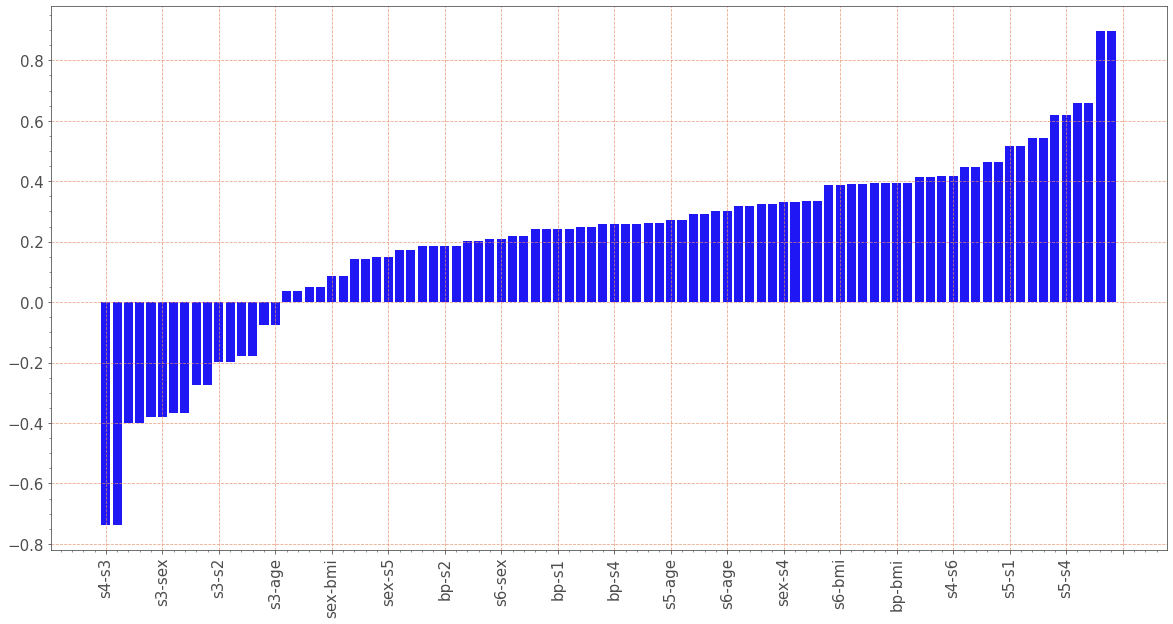

In [146]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
# plt.xticks(col_names[sort_idxs][::2]);

### Ampute diabetes

In [147]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [435]:
X_miss, mask = amputation.ampute(X_full, 0.3, "MCAR", vars_observed=[0, 2], score_func='SIGMOID-LEFT',frame=True)#weights = [-10,1,-5,-5,0,-20,1,2,-3,10]

In [436]:
# mask = pd.DataFrame(~np.random.choice([0, 1], size=(X_full.shape), p=[3./4, 1./4]).astype(bool), columns = X_full.columns)

In [437]:
# X_miss = X_full

In [438]:
# X_miss = X_miss[~mask]

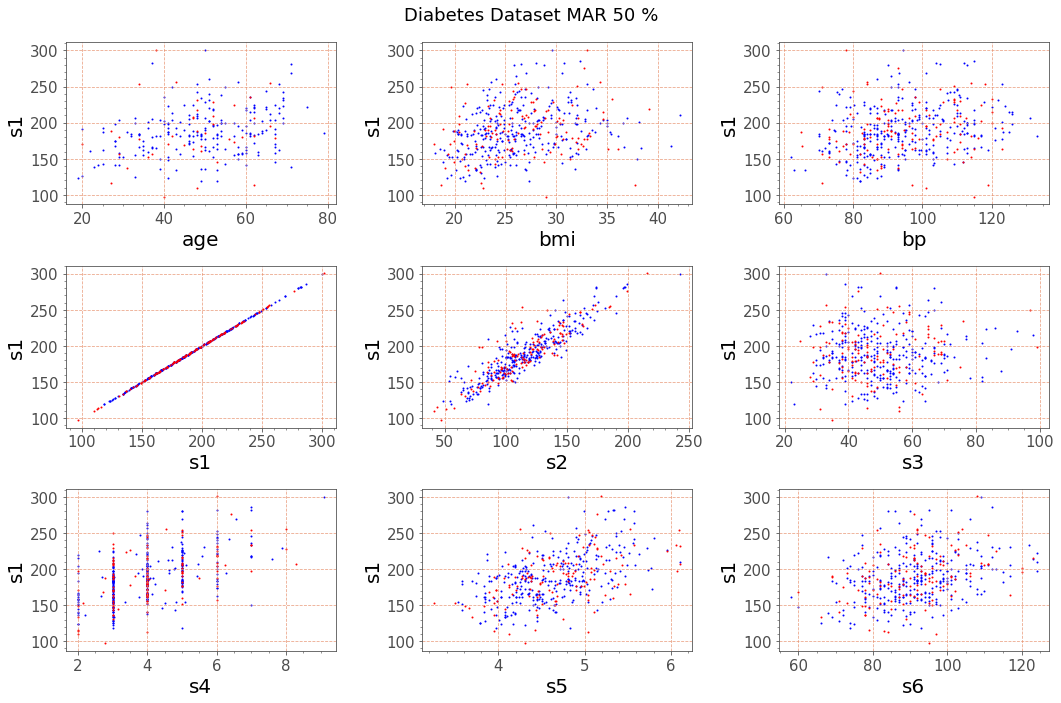

In [439]:
# Don't plot the sex data
features = list(X_miss.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset MAR 50 %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], X_miss['s1'], s=1, color='b')
        axs[i, j].scatter(X_full[mask][feature], X_full[mask]['s1'], s=1, color='r')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('s1')
plt.tight_layout()
plt.show()

In [440]:
corr_miss = X_miss.corr()
corr_miss.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.15,0.12,0.25,0.31,0.26,-0.05,0.20,0.30,0.25
sex,0.15,1.00,0.04,0.20,0.05,0.16,-0.38,0.35,0.14,0.16
bmi,0.12,0.04,1.00,0.40,0.27,0.27,-0.33,0.39,0.47,0.36
bp,0.25,0.20,0.40,1.00,0.29,0.24,-0.13,0.24,0.39,0.38
s1,0.31,0.05,0.27,0.29,1.00,0.90,0.01,0.55,0.54,0.31
s2,0.26,0.16,0.27,0.24,0.90,1.00,-0.26,0.71,0.37,0.28
s3,-0.05,-0.38,-0.33,-0.13,0.01,-0.26,1.00,-0.75,-0.39,-0.26
s4,0.20,0.35,0.39,0.24,0.55,0.71,-0.75,1.00,0.59,0.40
s5,0.30,0.14,0.47,0.39,0.54,0.37,-0.39,0.59,1.00,0.45
s6,0.25,0.16,0.36,0.38,0.31,0.28,-0.26,0.40,0.45,1.00


In [441]:
corr_pairs_flat_miss, sort_idxs_miss, names = sorted_corr_pairs(corr_miss)

<Figure size 1440x720 with 0 Axes>

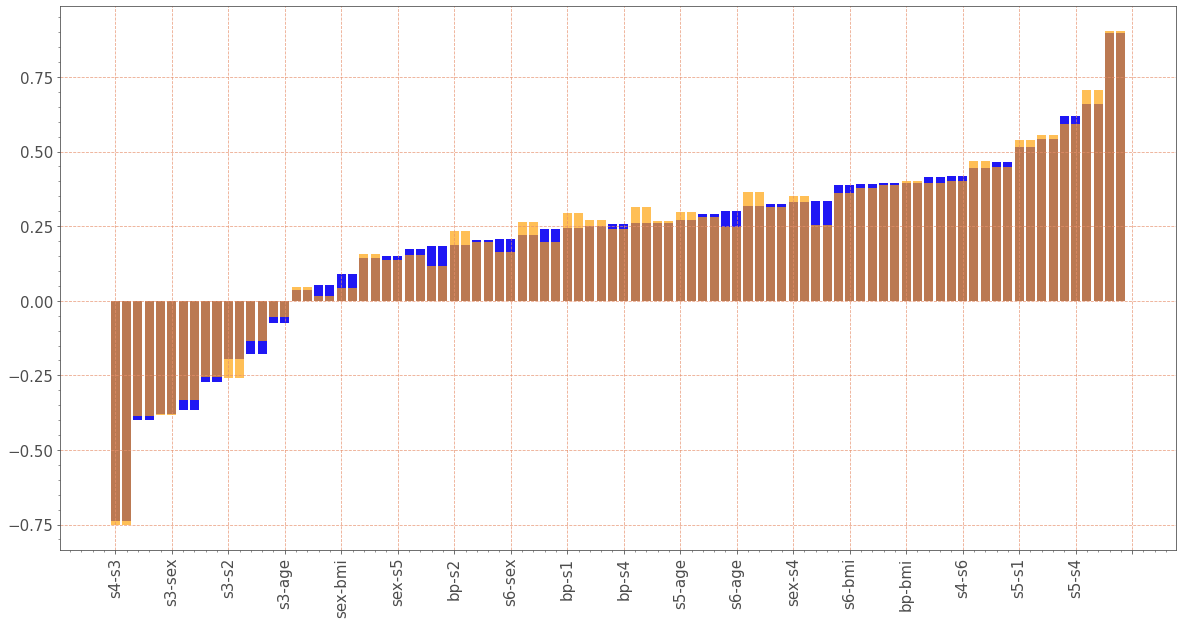

In [442]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.7)
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
# plt.xticks(col_names[sort_idxs][::2]);

### Impute diabetes

In [443]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

In [444]:
imp = imputation.impute(X_miss, 'ice',frame=True)

In [445]:
imp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.000000,2.000000,32.100000,101.000000,157.000000,93.200000,38.000000,4.000000,4.859800,87.000000
1,48.000000,1.000000,21.600000,87.000000,183.000000,103.200000,70.000000,3.000000,3.891800,69.000000
2,72.000000,2.027939,29.568378,96.393991,264.040899,179.697699,50.368687,5.680028,5.101212,98.963950
3,24.000000,0.442833,34.402105,90.727412,127.552899,64.323752,40.629173,3.273055,4.329669,77.717735
4,50.000000,1.000000,23.000000,101.000000,192.000000,125.400000,52.000000,4.000000,4.290500,80.000000
...,...,...,...,...,...,...,...,...,...,...
437,55.879456,2.000000,28.200000,112.000000,185.000000,113.800000,42.000000,4.000000,4.983600,93.000000
438,47.000000,2.000000,24.900000,75.000000,225.000000,166.000000,42.000000,5.000000,4.442700,102.000000
439,60.000000,2.000000,24.900000,99.670000,162.000000,106.600000,43.000000,3.770000,4.127100,95.000000
440,36.000000,1.000000,30.000000,95.000000,201.000000,125.200000,42.000000,4.790000,5.129900,85.000000


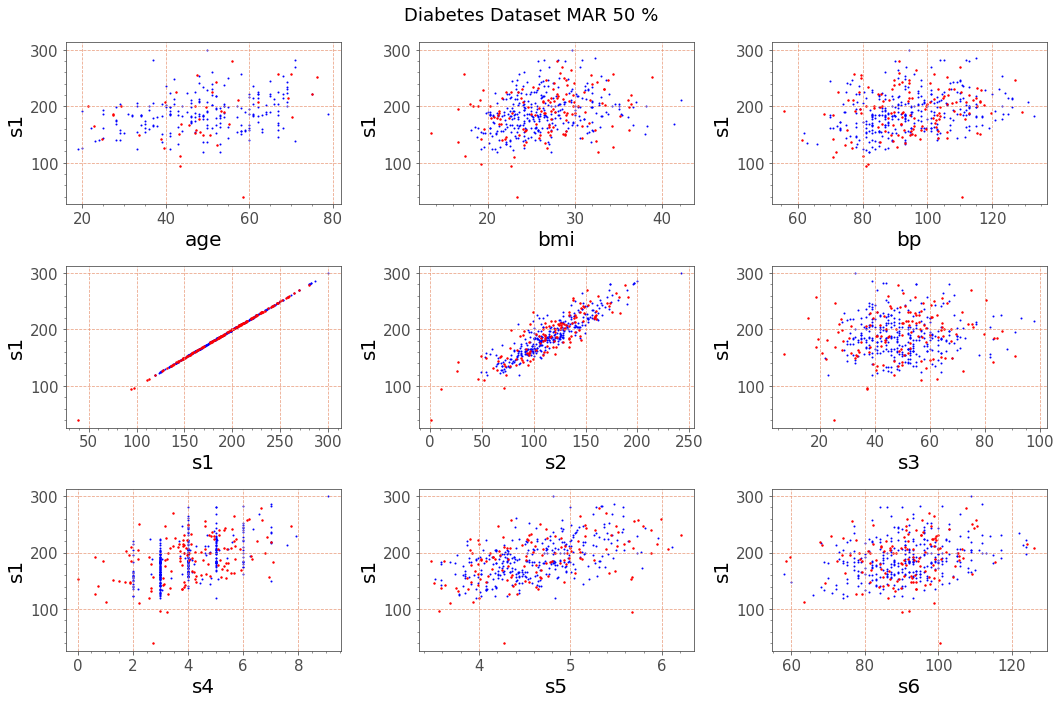

In [446]:
# Don't plot the sex data
features = list(imp.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset MAR 50 %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], X_miss['s1'], s=1, color='b')
        axs[i, j].scatter(imp[mask][feature], imp[mask]['s1'], s=2, color='r')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('s1')
plt.tight_layout()
plt.show()

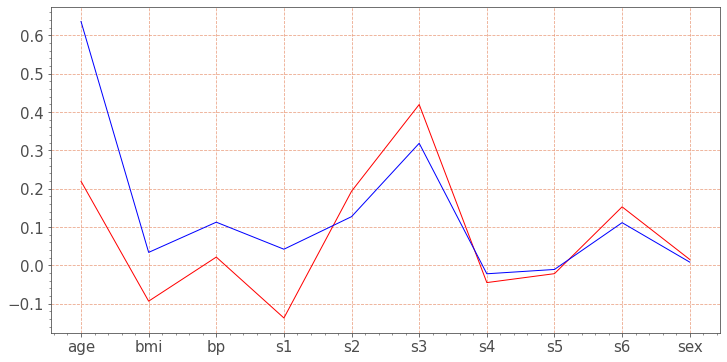

In [447]:

idx_i = np.argsort(X_miss.mean())
plt.plot(X_miss.mean()[idx_i] - X_full.mean(), 'r-')
# plt.plot(X_full.mean(), 'k-')
plt.plot(imp.mean()[idx_i] - X_full.mean(), 'b-')

In [448]:
corr_pairs_flat_imp, sort_idxs_imp, names = sorted_corr_pairs(imp.corr())

<Figure size 1440x720 with 0 Axes>

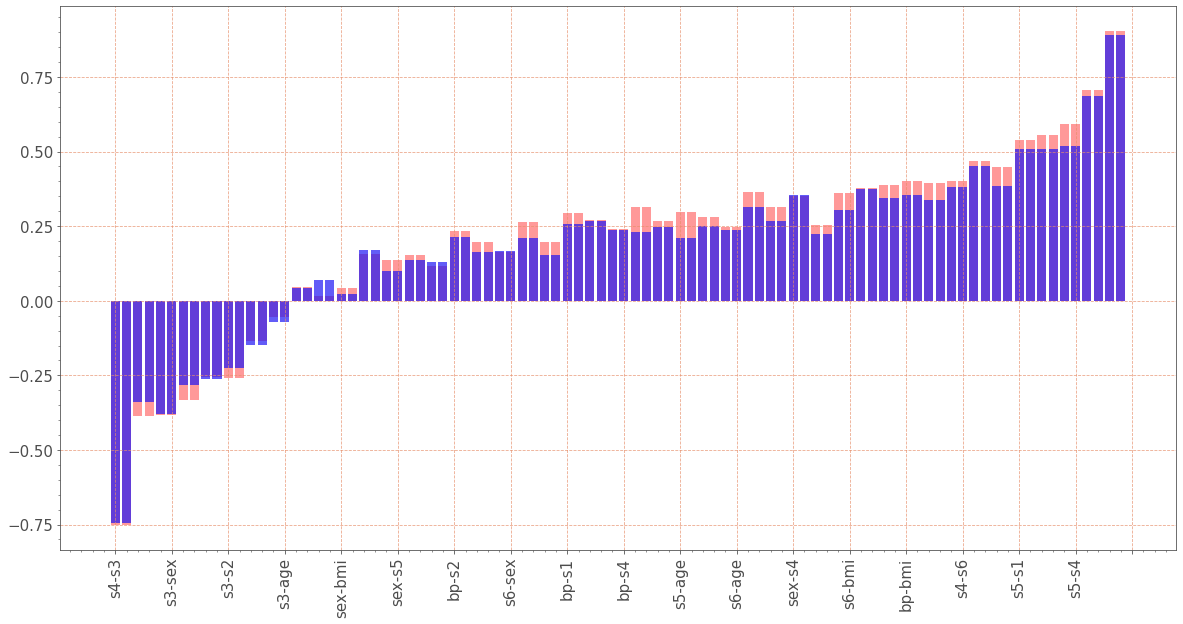

In [449]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])/
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.4, color='r')
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_imp[sort_idxs], alpha=0.7)
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
# plt.xticks(col_names[sort_idxs][::2]);

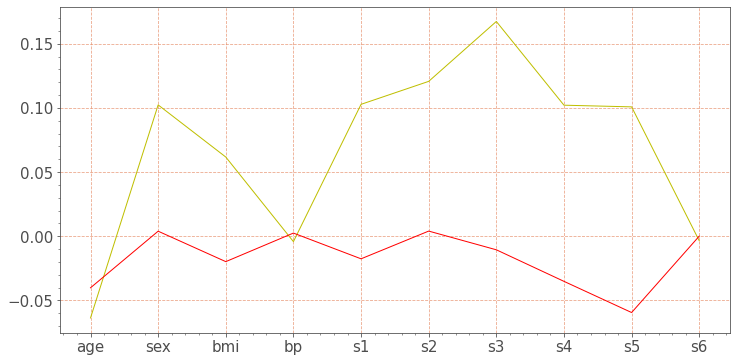

In [450]:
plt.plot((imp.var()-X_full.var())/X_full.var(), 'y-')
plt.plot((X_miss.var()-X_full.var())/X_full.var(), 'r-')
# plt.plot(X_full.var())

### Variance